Copyright © 2017-2021 ABBYY Production LLC

In [1]:
#@title
# 
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# *k*-means clustering

[Download the tutorial as a Jupyter notebook](https://github.com/neoml-lib/neoml/blob/master/NeoML/docs/en/Python/tutorials/KMeans.ipynb)

In this tutorial, we will use the NeoML implementation of *k*-means clustering algorithm to clusterize a randomly generated dataset.

The tutorial includes the following steps:

* [Generate the dataset](#Generate-the-dataset)
* [Cluster the data](#Cluster-the-data)
* [Visualize the results](#Visualize-the-results)

## Generate the dataset

*Note:* This section doesn't have any NeoML-specific code. It just generates a dataset. If you are not running this notebook, you may [skip](#Cluster-the-data) this section.

Let's generate a dataset of 4 clusters on the plane. Each cluster will be generated from center + noise taken from normal distribution for each coordinate.

In [2]:
import numpy as np

np.random.seed(451)

n_dots = 128
n_clusters = 4
centers = np.array([(-2., -2.),
                   (-2., 2.),
                   (2., -2.),
                   (2., 2.)])
X = np.zeros(shape=(n_dots, 2), dtype=np.float32)
y = np.zeros(shape=(n_dots,), dtype=np.int32)

for i in range(n_dots):
    # Choose random center
    cluster_id = np.random.randint(0, n_clusters)
    y[i] = cluster_id
    # object = center + some noise
    X[i, 0] = centers[cluster_id][0] + np.random.normal(0, 1)
    X[i, 1] = centers[cluster_id][1] + np.random.normal(0, 1)

## Cluster the data

Now we'll create a `neoml.Clustering.KMeans` class that represents the clustering algorithm, and feed the data into it.

In [3]:
import neoml

kmeans = neoml.Clustering.KMeans(max_iteration_count=1000,
                                 cluster_count=n_clusters,
                                 thread_count=4)
y_pred, centers_pred, vars_pred = kmeans.clusterize(X)

Before going further let's take a look at the returned data.

In [4]:
print('y_pred')
print('  ', type(y_pred))
print('  ', y_pred.shape)
print('  ', y_pred.dtype)

print('centers_pred')
print('  ', type(centers_pred))
print('  ', centers_pred.shape)
print('  ', centers_pred.dtype)

print('vars_pred')
print('  ', type(vars_pred))
print('  ', vars_pred.shape)
print('  ', vars_pred.dtype)

y_pred
   <class 'numpy.ndarray'>
   (128,)
   int32
centers_pred
   <class 'numpy.ndarray'>
   (4, 2)
   float64
vars_pred
   <class 'numpy.ndarray'>
   (4, 2)
   float64


As you can see, the `y_pred` array contains the cluster indices of each object. `centers_pred` and `disps_pred` contain centers and variances of each cluster.

## Visualize the results

In this section we'll draw both clusterizations: ground truth and predicted.

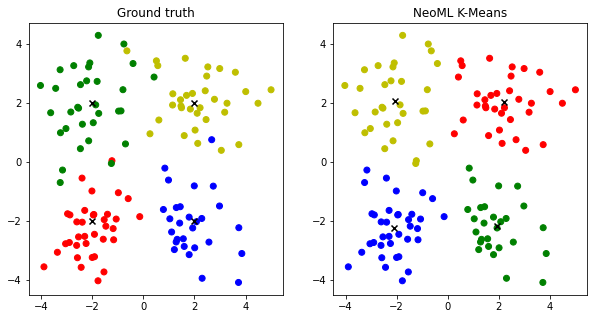

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

colors = {
    0: 'r',
    1: 'g',
    2: 'b',
    3: 'y'
}

# Create figure with 2 subplots
fig, axs = plt.subplots(ncols=2)
fig.set_size_inches(10, 5)

# Show ground truth
axs[0].set_title('Ground truth')
axs[0].scatter(X[:, 0], X[:, 1], marker='o', c=list(map(colors.get, y)))
axs[0].scatter(centers[:, 0], centers[:, 1], marker='x', c='black')

# Show NeoML markup
axs[1].set_title('NeoML K-Means')
axs[1].scatter(X[:, 0], X[:, 1], marker='o', c=list(map(colors.get, y_pred)))
axs[1].scatter(centers_pred[:, 0], centers_pred[:, 1], marker='x', c='black')

plt.show()

As you can see, *k*-means didn't clusterize the outliers correctly.